In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('C:/Users/Dell/Desktop/Assignments/SVM/forestfires.csv')

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'area'}, xlabel='month'>

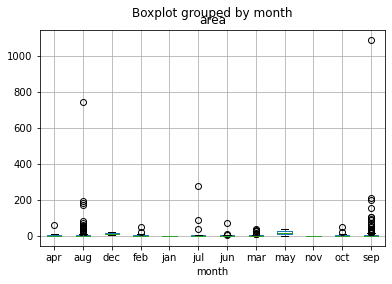

In [7]:
data.boxplot(column='area', by='month')

<AxesSubplot:title={'center':'area'}, xlabel='month'>

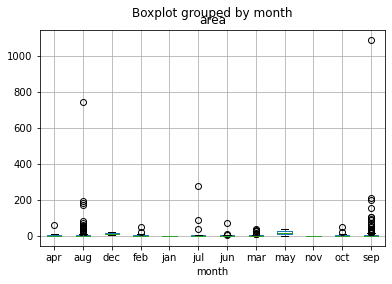

In [8]:
data.boxplot(column='area', by='month')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='wind', ylabel='Count'>

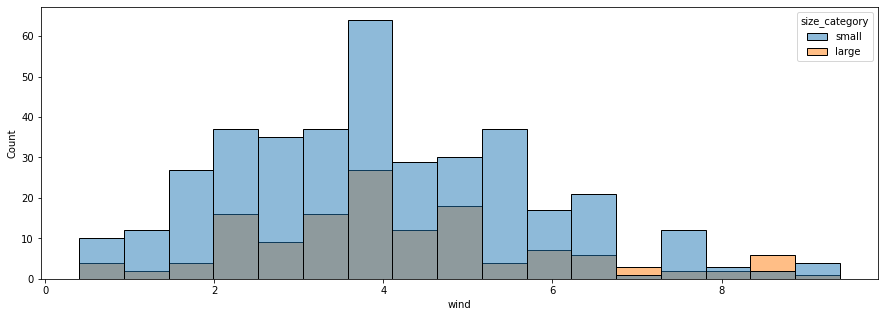

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(x = data['wind'], hue = data['size_category'])

<AxesSubplot:xlabel='temp', ylabel='Count'>

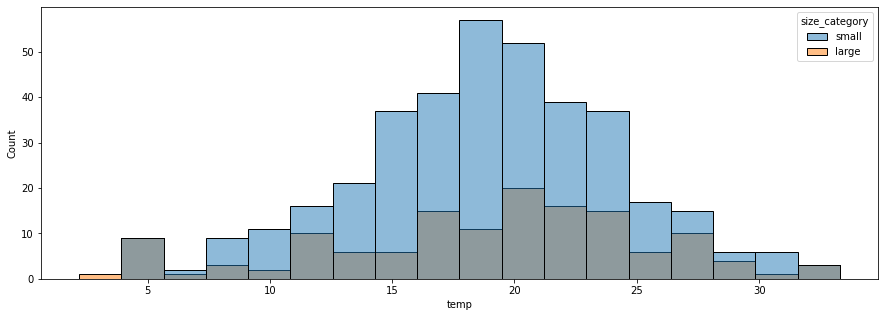

In [26]:
plt.figure(figsize=(15,5))
sns.histplot(x = data['temp'], hue = data['size_category'])

<AxesSubplot:xlabel='rain', ylabel='Count'>

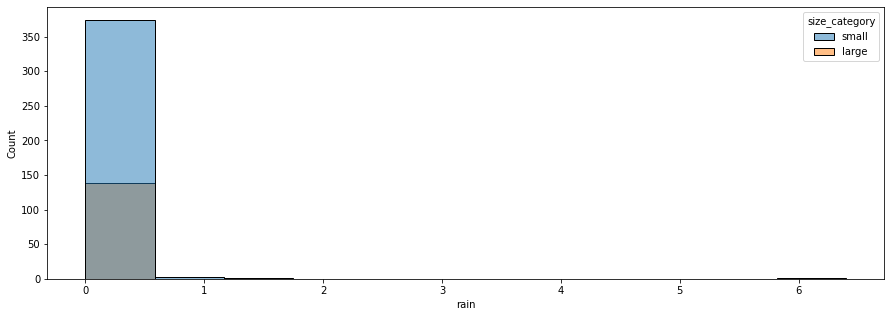

In [27]:
plt.figure(figsize=(15,5))
sns.histplot(x = data['rain'], hue = data['size_category'])

<AxesSubplot:xlabel='ISI', ylabel='Count'>

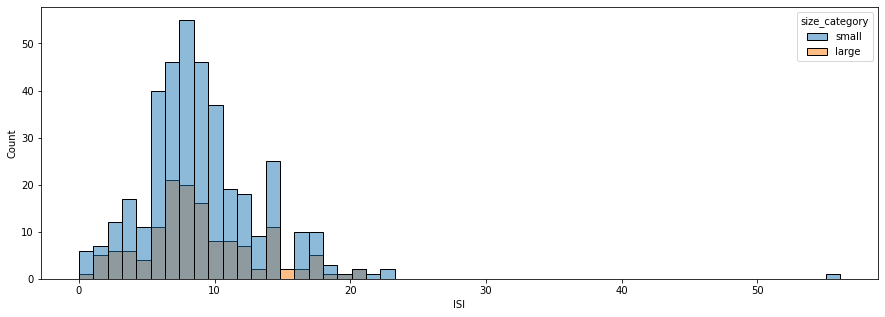

In [28]:
plt.figure(figsize=(15,5))
sns.histplot(x = data['ISI'], hue = data['size_category'])

<AxesSubplot:xlabel='DC', ylabel='Count'>

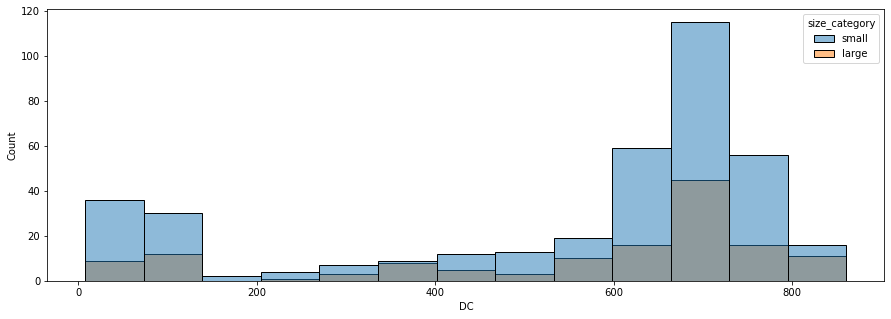

In [29]:
plt.figure(figsize=(15,5))
sns.histplot(x = data['DC'], hue = data['size_category'])

<AxesSubplot:xlabel='DMC', ylabel='Count'>

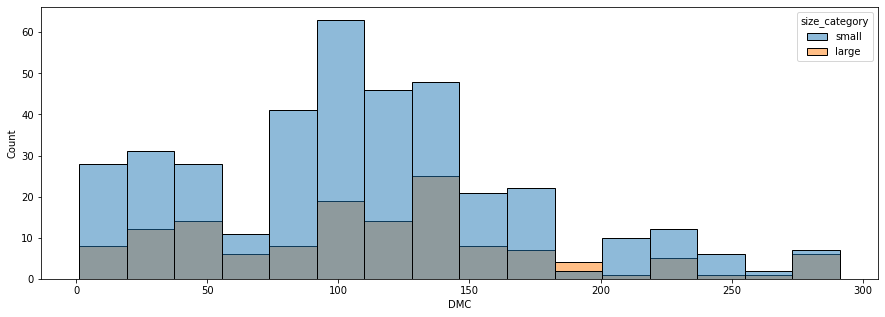

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(x = data['DMC'], hue = data['size_category'])

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

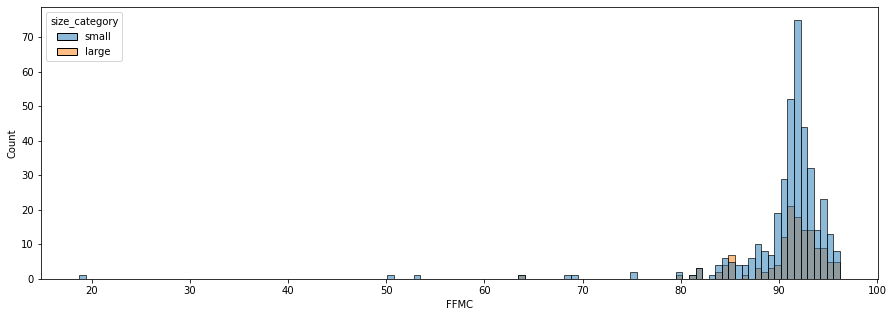

In [31]:
plt.figure(figsize=(15,5))
sns.histplot(x = data['FFMC'], hue = data['size_category'])

In [9]:
data1 = data.drop(['month','day'],axis=1)

In [10]:
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
scaling_function = StandardScaler()
data2 = scaling_function.fit_transform(data1.iloc[:,:9])

In [12]:
data3 = pd.DataFrame(data2)

In [13]:
data3.head()

,0,1,2,3,4,5,6,7,8
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


In [14]:
final_data = data1.iloc[:,9:].join(data3)
final_data

,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,...,size_category,0,1,2,3,4,5,6,7,8
0,1,0,0,0,0,0,0,0,0,0,...,small,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,0,0,0,0,0,1,0,0,0,0,...,small,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,0,0,1,0,0,0,0,0,0,0,...,small,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,1,0,0,0,0,0,0,0,0,0,...,small,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,0,0,0,1,0,0,0,0,0,0,...,small,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0,0,1,0,...,large,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0,0,0,1,0,0,0,0,1,0,...,large,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0,0,0,1,0,0,0,0,1,0,...,large,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0,0,1,0,0,0,0,0,1,0,...,small,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [15]:
column_pop = final_data.pop('size_category')
final_data.insert(0, 'size_category', column_pop)

In [16]:
final_data.head()

,size_category,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,...,monthsep,0,1,2,3,4,5,6,7,8
0,small,1,0,0,0,0,0,0,0,0,...,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,small,0,0,0,0,0,1,0,0,0,...,0,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,small,0,0,1,0,0,0,0,0,0,...,0,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,small,1,0,0,0,0,0,0,0,0,...,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,small,0,0,0,1,0,0,0,0,0,...,0,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


In [17]:
#Train and Test split
array = final_data.values
X = array[:,1:]
y = array[:,0]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((361, 28), (156, 28), (361,), (156,))

In [20]:
#SVC 
clf = SVC()
param_grid = [{'kernel':['poly'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2], 'kernel': ['poly']}])

In [21]:
gsv.best_params_, gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'poly'}, 0.8340840840840841)

In [22]:
clf = SVC(C=0.01,gamma=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy = " ,accuracy)
confusion_matrix(y_test,y_pred)

accuracy =  71.15384615384616


array([[  0,  45],
       [  0, 111]], dtype=int64)

In [23]:
y_pred

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma